<a href="https://colab.research.google.com/github/alecoder1/Laptop-Price-Prediction/blob/main/laptop_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
## information about the data

df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data/laptop_data.csv", index_col=0) #Removes unnamed: 0 column
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 11)

# New Section

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [ ]:
# Removing duplicate rows from our dataset.

df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.groupby("Company")["TypeName"].value_counts()

Company    TypeName          
Acer       Notebook               76
           2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Ultrabook               4
Apple      Ultrabook              21
Asus       Notebook               62
           Gaming                 54
           Ultrabook              18
           2 in 1 Convertible     13
           Netbook                 4
Chuwi      Notebook                3
Dell       Notebook              159
           Ultrabook              49
           Gaming                 40
           2 in 1 Convertible     30
           Workstation            11
           Netbook                 2
Fujitsu    Notebook                3
Google     Ultrabook               3
HP         Notebook              180
           Ultrabook              36
           2 in 1 Convertible     19
           Workstation            14
           Gaming                 12
           Netbook                 7
Huawei     Ultrabook               2
LG         Ultrabook               3
Lenovo     Notebook              174
           2 in 1 Convertible     44
           Gaming                 32
           Ultrabook              31
           Netbook                 4
           Workstation             4
MSI        Gaming                 54
Mediacom   Notebook                6
           2 in 1 Convertible      1
Microsoft  Ultrabook               6
Razer      Gaming                  5
           Ultrabook               2
Samsung    Ultrabook               5
           2 in 1 Convertible      2
           Netbook                 1
           Notebook                1
Toshiba    Notebook               36
           Ultrabook              12
Vero       Notebook                4
Xiaomi     Notebook                2
           Ultrabook               2
Name: count, dtype: int64

In [ ]:
df.isna().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


There are no missing values in our dataset.

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Data Visualization

In [ ]:
df_pivot = df.pivot_table(index='Company', columns='TypeName', values='Price', margins = True).fillna(0)
df_pivot

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,All
Company,,,,,,,
Acer,37229.466600,78221.700000,16303.680000,29130.769895,47445.840000,0.000000,33750.986186
Apple,0.000000,0.000000,0.000000,0.000000,83340.499886,0.000000,83340.499886
Asus,52021.813292,91641.886133,14183.136000,33917.205832,72066.528000,0.000000,60143.988302
Chuwi,0.000000,0.000000,0.000000,16745.726400,0.000000,0.000000,16745.726400
Dell,60295.395360,102211.979040,27678.960000,47054.265509,78743.349257,118237.329164,63894.714408
Fujitsu,0.000000,0.000000,0.000000,38841.120000,0.000000,0.000000,38841.120000
Google,0.000000,0.000000,0.000000,0.000000,89386.080000,0.000000,89386.080000
HP,80282.836800,75875.160000,65777.965714,43698.873680,81898.848800,122527.064571,57559.165307
Huawei,0.000000,0.000000,0.000000,0.000000,75870.720000,0.000000,75870.720000


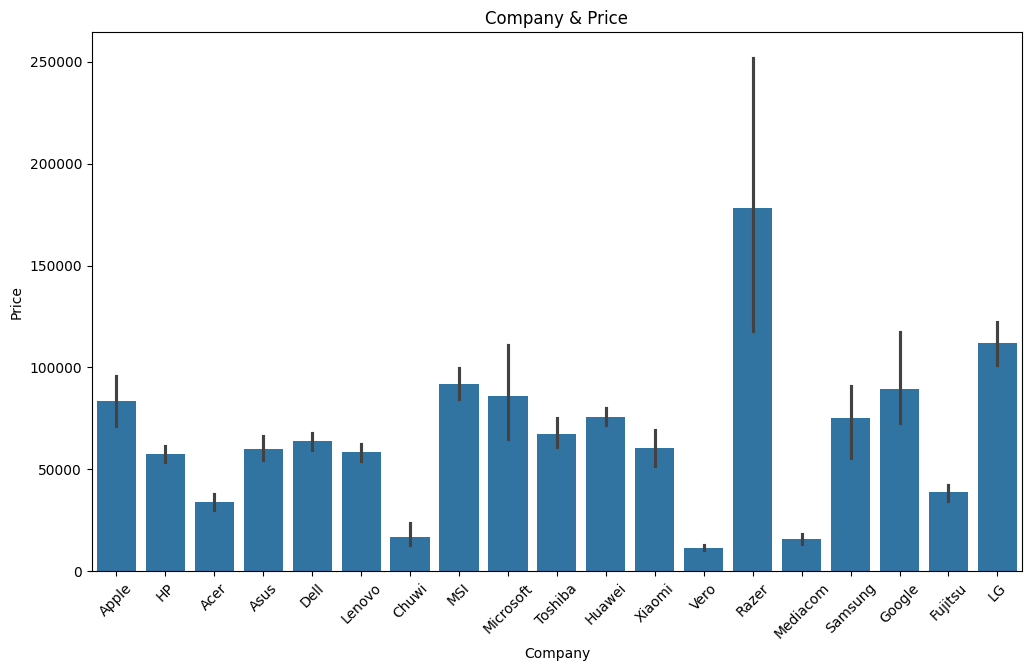

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x= "Company", y= "Price", data=df)
plt.title("Company & Price")
plt.xticks(rotation=45)
plt.show()

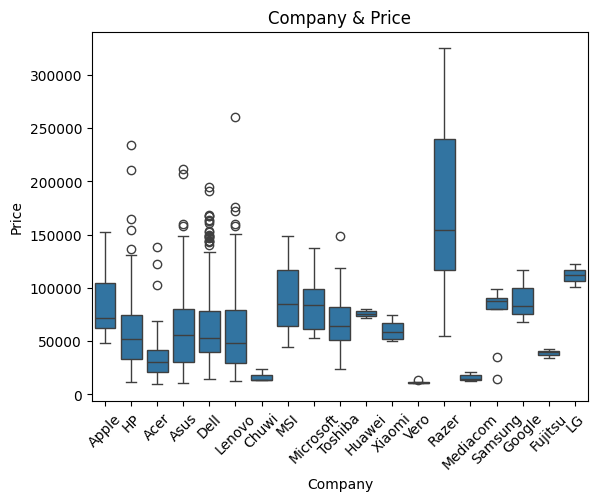

In [ ]:
sns.boxplot(x = "Company", y = "Price", data= df)
plt.title("Company & Price")
plt.xticks(rotation=45)
plt.show()

From this figure, it is clear that the company with the highest price for its laptops is Razer.

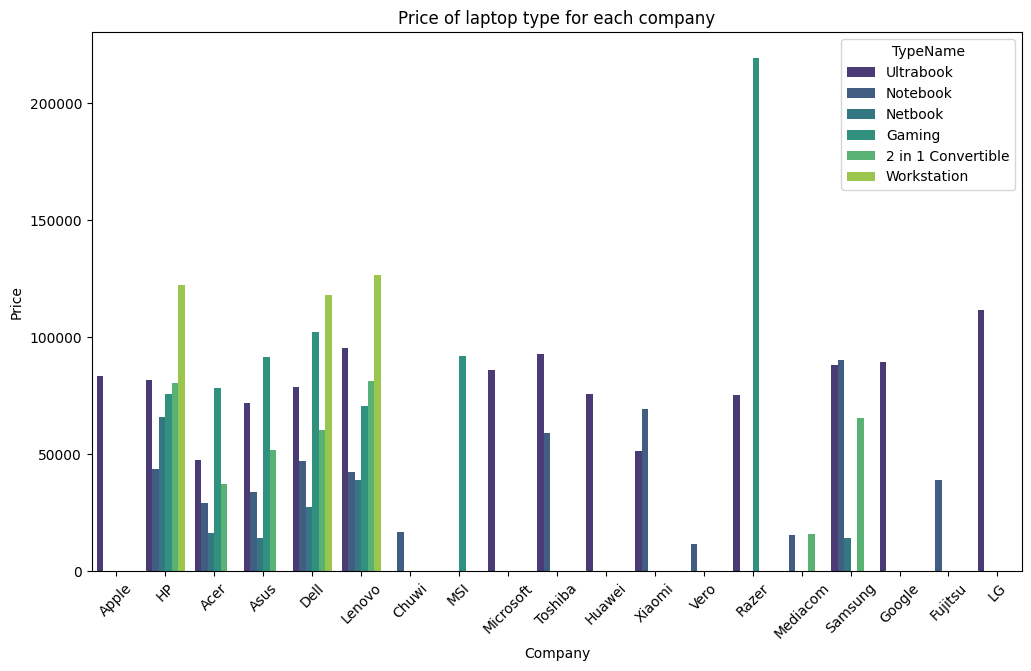

In [ ]:
plt.figure(figsize= (12, 7))
sns.barplot(x = "Company", y = "Price", data= df, errorbar=None, hue = "TypeName", palette= "viridis")
plt.title("Price of laptop type for each company")
plt.xticks(rotation=45)
plt.show()

The highest laptop type in a Razer company is the 'Gaming' laptop.

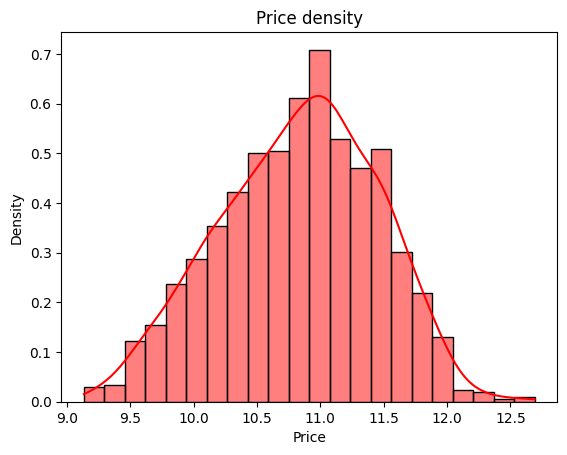

59874.14171519782


In [ ]:
sns.histplot(np.log(df['Price']), kde = True, color="red", stat="density")
plt.title("Price density")
plt.show()
print(np.exp(11))

The highest density of price is about 59874.

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
print(df['Weight'].values)
df['Weight'] = df['Weight'].astype(str).str.replace('kg',' ')  # Change the data type to string before applying .str
df['Weight']= df['Weight'].astype(float)

[1.37 1.34 1.86 ... 1.3  1.5  2.19]


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
print(df['Ram'].values)
df['Ram'] = df['Ram'].astype(str).str.replace('GB', ' ')
df['Ram'] = df['Ram'].astype(float)

[ 8.  8.  8. ... 16.  2.  6.]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   float64
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(4), object(7)
memory usage: 119.4+ KB


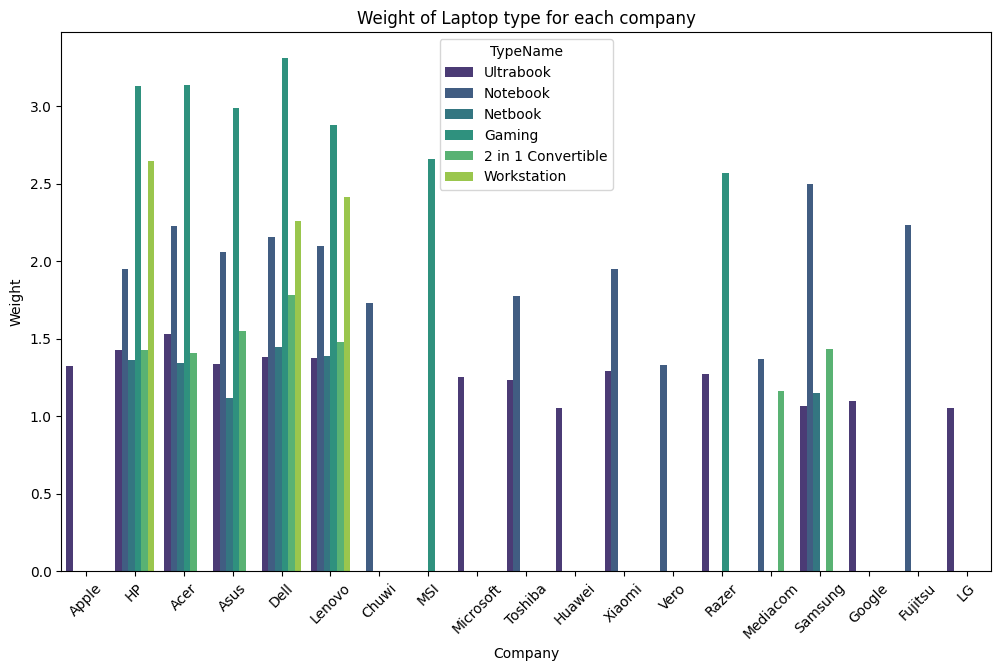

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x= "Company", y= "Weight", data=df, errorbar=None, hue= "TypeName", palette="viridis")
plt.title("Weight of Laptop type for each company")
plt.xticks(rotation=45)
plt.show()

"Gaming" laptops are clearly the heaviest of all the companies while the lightest of them all is the "Ultra" laptops.

In [ ]:
df.groupby("Company")["Price"].mean().sort_values(ascending=False)

,Price
Company,
Razer,178282.491429
LG,111834.720000
MSI,92116.226133
Google,89386.080000
Microsoft,85903.788000
Apple,83340.499886
Huawei,75870.720000
Samsung,75308.320000
Toshiba,67549.050000


In [ ]:
# Converting categorical feature into numerical features to show correlation between the features

label_encoder = LabelEncoder() #  is a preprocessing tool from sklearn.preprocessing that assigns a unique integer to each unique categorical value.

for col in df.select_dtypes(include = ['object']).columns: #selects all columns where the data type is object (i.e., categorical variables).
  df[col] = label_encoder.fit_transform(df[col])

In machine learning and data analysis, categorical (text-based) features cannot be directly used in numerical computations like correlation analysis.

This code converts categorical columns into numerical representations using Label Encoding to make them usable in correlation calculations.



In [ ]:
df.dtypes

,0
Company,int64
TypeName,int64
Inches,float64
ScreenResolution,int64
Cpu,int64
Ram,float64
Memory,int64
Gpu,int64
OpSys,int64
Weight,float64


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8.0,4,58,8,1.37,71378.6832
1,1,4,13.3,1,63,8.0,2,51,8,1.34,47895.5232
2,7,3,15.6,8,74,8.0,16,53,4,1.86,30636.0000
3,1,4,15.4,25,85,16.0,29,9,8,1.83,135195.3360
4,1,4,13.3,23,67,8.0,16,59,8,1.37,96095.8080


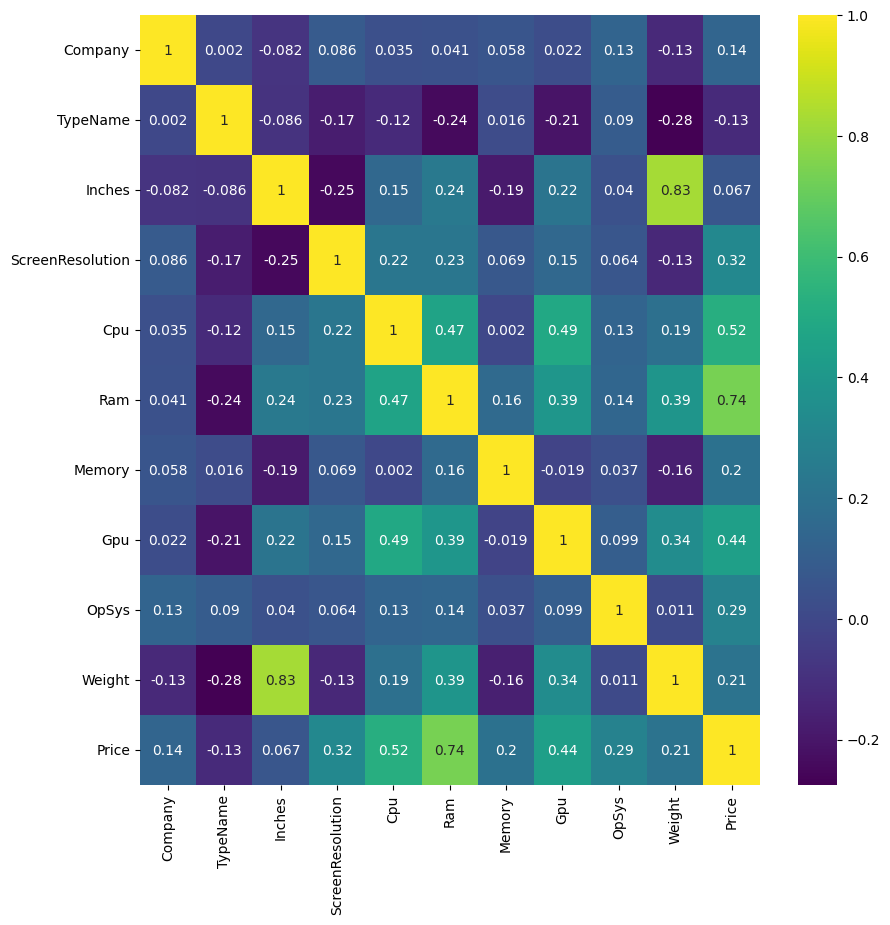

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt = '.2g', cmap="viridis")
plt.show()

All correlations between features are weak correlations except the correlation between "Weight" and "Inches" are strong positive correlation and fairly strong positive correlation between "Ram" and "Price".

## Building Models

In [ ]:
X = df.drop("Price", axis=1) # removes the "Price" column from the dataset df, keeping all other columns.
                            # The remaining columns are stored in X, which will be used as features (input variables) for training the model.
                            # Now, X contains all independent variables, while "Price" is removed because it's our target variable.
                            # Now, X contains only the independent variables.
                            # axis=1 means we are dropping a column (not a row).
y = np.log(df["Price"] + 1e-8) # Applies a natural logarithm (log) transformation to the Price column
                              # 1e-8 (which is 0.00000001) is added to prevent taking the log of zero, which would cause a math error.
                              # The transformed values are stored in y, which is our dependent variable (target) for model training.

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state= 42)

train_test_split() is a function from sklearn.model_selection that splits the dataset into:

Training set → Used to train the model.
Testing set → Used to evaluate the model’s performance on unseen data.

This ensures that the model learns from one portion of the data and is tested on completely separate data to check its accuracy.

X: The feature matrix (independent variables).
y: The target variable (log-transformed "Price" in this case).

test_size=0.2
20% of the data will be used for testing, and 80% for training.
If test_size=0.3, then 30% would be for testing, and 70% for training.

random_state=42
This ensures reproducibility.
Setting random_state=42 means that every time you run the code, the split will be exactly the same.
If you don’t set this, train_test_split() will split the data randomly differently every time, leading to different results.

In [ ]:
Scaling_Features = StandardScaler()
X_train = Scaling_Features.fit_transform(X_train)
X_test = Scaling_Features.transform(X_test)

In [ ]:
Linear_Regression = LinearRegression(n_jobs= -1)

ridge = Ridge(max_iter= 500, alpha= 0.001, solver="auto")

decision_tree = DecisionTreeRegressor(max_depth= 5, random_state= 42, min_samples_split= 10, min_samples_leaf= 3)

random_forest = RandomForestRegressor(n_estimators= 100, max_depth= 5, random_state= 42, min_samples_split= 10, min_samples_leaf= 3)

svr = SVR(kernel= 'linear')

xgb = XGBRegressor(n_estimators= 100, max_depth= 5, min_samples_split= 10, min_samples_leaf= 3, random_state= 42)

In [ ]:
Linear_Regression = LinearRegression(n_jobs= -1)
ridge = Ridge(max_iter= 500, alpha= 0.001, solver="auto")
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

In [ ]:
param_grid = [
    {
    "estimator" : [Linear_Regression],
    },
    {
        "estimator" : [ridge],
    },
    {
        "estimator" : [decision_tree],
        "estimator__max_depth" : np.array([5, 10, 15, 20]),
        "estimator__min_samples_split" : np.array([2, 5, 10, 20]),
        "estimator__min_samples_leaf" : np.array([1, 2, 5, 10]),
    },
    {
        "estimator" : [random_forest],
        "estimator__max_depth" : np.array([5, 10, 15, 20]),
        "estimator__n_estimators" : np.array([100,150 ,200, 250]),
        "estimator__min_samples_split" : np.array([2, 5, 10, 20]),
        "estimator__min_samples_leaf" : np.array([1, 2, 5, 10]),
    },
    {
        "estimator" : [svr],
        "estimator__kernel" : ["linear", "poly", "rbf"],
        "estimator__C" : np.array([0.001, 0.01, 0.1]),
        "estimator__gamma" : np.array(["scale", "auto"]),
    },
    {
        "estimator" : [xgb],
        "estimator__max_depth" : np.array([5, 10, 15, 20]),
        "estimator__n_estimators" : np.array([100,150 ,200, 250]),
    },
]

The below code:
  - Creates a machine learning pipeline (Pipeline).
    - A Pipeline chains multiple steps into one object.
    - This allows for seamless preprocessing + model training.
    - Here, we only define the estimator step (a placeholder for models).
  - Performs hyperparameter tuning (GridSearchCV).
   - Finds the best model and its optimal parameters.
   - Performs 10-fold cross-validation to evaluate models.
   - Splits the data into 10 parts → 9 for training, 1 for validation.
  - Trains models on X_train, y_train to find the best one.
    - Fits all models with different hyperparameter combinations.
    - Evaluates them using 10-fold cross-validation.
    - Finds the best model and hyperparameters

In [ ]:
pipeline = Pipeline([("estimator" , Linear_Regression)])
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.68017959 0.68017961 0.77692072 0.77467601 0.77618078 0.77914521
 0.78232116 0.78211538 0.78165432 0.78145856 0.77870226 0.77874307
 0.77874307 0.77995493 0.77718519 0.77718519 0.77718519 0.7769442
 0.80307517 0.80097854 0.80425865 0.80416262 0.8010039  0.80341363
 0.80556504 0.80719545 0.80881753 0.81032184 0.80887449 0.80860649
 0.81382689 0.81390589 0.81359582 0.81390589 0.78310292 0.79663124
 0.80351504 0.80453536 0.80680621 0.80359172 0.80824549 0.81275536
 0.81275453 0.81282121 0.81363742 0.81378554 0.8148629  0.81517297
 0.81463182 0.81463182 0.78447566 0.78201249 0.79984341 0.80790396
 0.80263338 0.80567539 0.8093669  0.81307786 0.81482306 0.81456246
 0.81497985 0.81395929 0.81494189 0.8148629  0.8148629  0.81494189
 0.82461745 0.82606463 0.82642486 0.82540942 0.82603063 0.82597274
 0.82592711 0.82534797 0.82469959 0.82471404 0.82518182 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('estimator',
                                        LinearRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'estimator': [LinearRegression(n_jobs=-1)]},
                         {'estimator': [Ridge(alpha=0.001, max_iter=500)]},
                         {'estimator': [DecisionTreeRegressor()],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__min_samples_leaf': array([ 1,  2,  5, 10]),
                          'estimator__min_s...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__n_estimators': array([100, 150, 200, 250])}])

In [ ]:
grid_search.best_score_

0.8860997629959797

In [ ]:
print(grid_search.best_score_)

0.8860997629959797


The best accuracy after training these models is about 90%.

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print(best_model)

Pipeline(steps=[('estimator',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])


- Best_model is now RandomForestRegressor with the best hyperparameters

## Making Predictions:

In [ ]:
y_pred = best_model.predict(X_test)
y_pred

array([10.10976491, 10.4827477 , 10.79071789, 10.68714752, 10.97119125,
       10.69580728, 11.33869112, 10.33510989, 10.83219049, 10.5120768 ,
       10.81348336, 11.6471953 , 10.85163119, 11.34292935, 10.6177831 ,
       11.15305471, 11.12196911, 11.37012827, 11.19352629,  9.92186901,
       10.92705245, 10.35930321, 10.76763228, 10.84551894, 11.51365879,
       11.38314549, 11.34403151, 11.46685012, 11.2319355 , 11.05226485,
       11.09261574, 11.4777267 , 10.76443897, 10.65608126, 11.26635138,
       10.75690726, 11.58760106, 10.34178077, 10.85009279, 10.15342024,
       12.03853595, 11.64663997, 11.10816267, 11.67170584, 10.7507481 ,
       10.71402996, 11.06092561, 11.00380273, 11.12072077, 11.23177064,
       11.1001302 , 11.02359552,  9.83227825, 11.01437697, 10.79033761,
        9.56641991, 10.56542329,  9.73081716, 10.86360262,  9.92277521,
       10.79379539, 11.28983577, 10.9681308 ,  9.96336398, 10.67624453,
       10.99281539, 11.66098805, 10.8119803 , 10.27280766, 11.09

## Evaluating the Model

- You can evaluate the performance of the best_model using metrics like R², RMSE, or MAE:


In [ ]:
# Calculating the RMSE (Root Mean Squared Error)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.04
R² Score: 0.89
Mean Absolute Error: 0.16


-  Use R² when you want to understand how well the model explains variance.
- Ranges from 0 to 1 (sometimes negative if the model is very bad).
- Higher R² = Better model fit.
        - R² = 1 → Perfect prediction (rare).
        - R² = 0.80 → 80% of the variance in the target is explained by the model.
        - R² = 0.0 → The model is no better than just predicting the average value.
        - R² < 0 → Model is performing worse than a simple average (bad model).
- Use RMSE if you care more about large errors.
      -  Good For: Comparing models with different target scales.
- Use MAE if you want a simple, interpretable error measurement.
        - Measures the average absolute difference between predictions and actual values.
        - Lower MAE = Better model.
        - MAE of $500 → The model is, on average, $500 off from actual values.
        - Unlike RMSE, MAE does not heavily penalize large errors.


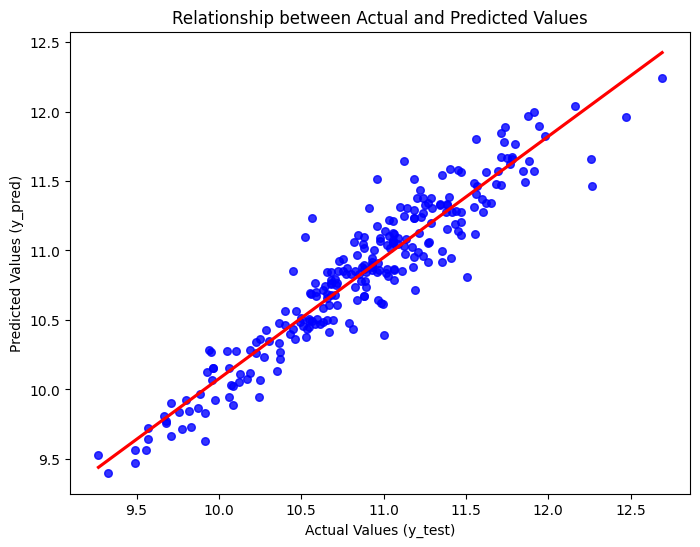

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, # Creates a scatter plot + regression line. & Plots actual values (true target values).
            y=y_pred, # Plots predicted values from the model.
            scatter_kws={"s" : 30, # Sets the size of the scatter points.
                         "color": "b"}, # Sets the color of scatter points (blue).
            line_kws = {"color": "red"}, # Plots a regression line in red.
            ci = None) # Removes confidence intervals around the regression line.
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Relationship between Actual and Predicted Values")
plt.show()

- The above code creates a scatter plot to compare actual vs. predicted values, helping us visually evaluate the model’s performance.
-  It creates a scatter plot of actual values (y_test) vs. predicted values (y_pred).
- Adds a regression line (in red) to show the trend.
- Helps diagnose model performance (ideally, points should be close to the red line).


## Saving the trained model

In [ ]:
import sklearn.svm as s
import joblib as jb


In [ ]:
jb.dump(grid_search, "grid_search.sav")

['grid_search.sav']

In [ ]:
jb.load("grid_search.sav")

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('estimator',
                                        LinearRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'estimator': [LinearRegression(n_jobs=-1)]},
                         {'estimator': [Ridge(alpha=0.001, max_iter=500)]},
                         {'estimator': [DecisionTreeRegressor()],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__min_samples_leaf': array([ 1,  2,  5, 10]),
                          'estimator__min_s...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__n_estimators': array([100, 150, 200, 250])}])